In [1]:
#Take and read dataset
import pandas as pd
df = pd.read_csv('/home/shabi/Desktop/Project/news_article/Newspaper-Article-Classification-master/data/train.csv')
df
print("df.shape = ", df.shape)
df.head()

df.shape =  (120000, 3)


,group,title,article
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [2]:
#grouping categories
import pandas as pd
df = pd.read_csv('/home/shabi/Desktop/Project/news_article/Newspaper-Article-Classification-master/data/train.csv')
categories = df.groupby('group')
print("Total Categories : ", categories.ngroups)
print(categories.size())

Total Categories :  4
group
1    30000
2    30000
3    30000
4    30000
dtype: int64


<Figure size 1440x360 with 0 Axes>

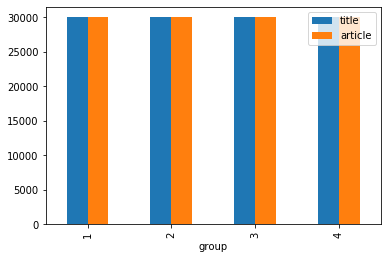

In [4]:
#plot graph
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))
df.groupby('group').count().plot.bar(ylim=0)
plt.show()

In [5]:
#fetch dataset
import numpy as np
from sklearn.datasets import fetch_20newsgroups
train = fetch_20newsgroups(subset='train', shuffle=True)
test = fetch_20newsgroups(subset='test', shuffle=True)

In [6]:
print(train.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [7]:
#Vectorization
import time
from sklearn.feature_extraction.text import CountVectorizer
t1=time.time()
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train.data)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print ("Time take to vectorize the training data:", round(time.time()-t1, 3), "secs")
print("Sample sparse matrix after vectorization:")
print (X_train_tfidf[0:4,0:20000])

Time take to vectorize the training data: 2.486 secs
Sample sparse matrix after vectorization:
  (0, 18299)	0.138749083899155
  (0, 16574)	0.14155752531572685
  (0, 4605)	0.06332603952480323
  (1, 7797)	0.13724375024886207
  (1, 2927)	0.05212944077716301
  (2, 15032)	0.07834044496813064
  (2, 12197)	0.05168179280403426
  (2, 6449)	0.06812813848609162
  (2, 6028)	0.10554465088856507
  (2, 5811)	0.2878251559842457
  (2, 5023)	0.13698619641739626
  (2, 3412)	0.06228731252083091
  (3, 18618)	0.14195950717692904
  (3, 4155)	0.05353413616615428


In [8]:
#KNN
from sklearn.pipeline import Pipeline
from sklearn import neighbors

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', neighbors.KNeighborsClassifier())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
t1=time.time()
predicted = text_clf.predict(test.data)
print ("Time take to Predict classes for testing data:", round(time.time()-t1, 3), "secs")
print("Accuracy:")
np.mean(predicted == test.target)

Time take to Vectorize training data and train model: 2.243 secs
Time take to Predict classes for testing data: 8.499 secs
Accuracy:


0.6591874668082847

In [9]:
#SVM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore")
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
t1=time.time()
predicted = text_clf.predict(test.data)
print ("Time take to Predict classes for testing data:", round(time.time()-t1, 3), "secs")
print("Accuracy:")
np.mean(predicted == test.target)

Time take to Vectorize training data and train model: 3.141 secs
Time take to Predict classes for testing data: 1.325 secs
Accuracy:


0.8532926181625067

In [10]:
#Naive Bayes
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
t1=time.time()
predicted = text_clf.predict(test.data)
print ("Time take to Predict classes for testing data:", round(time.time()-t1, 3), "secs")
print("Accuracy:")
np.mean(predicted == test.target)


Time take to Vectorize training data and train model: 2.392 secs
Time take to Predict classes for testing data: 1.399 secs
Accuracy:


0.7738980350504514

In [11]:
#Sparse matrix
ngram_vectorizer = CountVectorizer()
counts = ngram_vectorizer.fit_transform(['Anagh Anagh is intelligent', 'Anmol is smart'])
print("Bag-of-Words")
print(ngram_vectorizer.get_feature_names())
print(counts.toarray().astype(int))

ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2))
counts = ngram_vectorizer.fit_transform(['Anagh', 'Anmol'])
print("Bi-grams")
print(ngram_vectorizer.get_feature_names())
print(counts.toarray().astype(int))

ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(3, 3))
counts = ngram_vectorizer.fit_transform(['Anagh', 'Anmol'])
print("Tri-grams")
print(ngram_vectorizer.get_feature_names())
print(counts.toarray().astype(int))

Bag-of-Words
['anagh', 'anmol', 'intelligent', 'is', 'smart']
[[2 0 1 1 0]
 [0 1 0 1 1]]
Bi-grams
[' a', 'ag', 'an', 'gh', 'h ', 'l ', 'mo', 'na', 'nm', 'ol']
[[1 1 1 1 1 0 0 1 0 0]
 [1 0 1 0 0 1 1 0 1 1]]
Tri-grams
[' an', 'agh', 'ana', 'anm', 'gh ', 'mol', 'nag', 'nmo', 'ol ']
[[1 1 1 0 1 0 1 0 0]
 [1 0 0 1 0 1 0 1 1]]
